In [34]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from   getdist       import plots, MCSamples 
from   astropy.table import Table

In [35]:
#sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')
sys.path.append('/global/u2/l/ldrm11/DESI')

In [36]:
from   schechter     import schechter, named_schechter

In [37]:
gama_vmax = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.19489,0.03903000056743622,0.26298999786376953,-19.896729767108155,7594841.842906503,3213540.202080313
0.1769,0.03903000056743622,0.22304376921442798,-19.345148105394813,4744480.2327530915,2423819.899631298
0.21845,0.03903000056743622,0.26298999786376953,-21.448400924157312,7594841.842906503,4468890.563670888
0.07737,0.03903000056743622,0.11292987662789934,-17.85082186533015,635194.7011307261,189455.44383488595
0.13108,0.03903000056743622,0.26298999786376953,-21.364310026743254,7594841.842906503,998008.3551280069
0.12964,0.03903000056743622,0.20426831744798465,-19.497313354368224,3682207.0915358975,965422.7798028872
0.22188,0.03903000056743622,0.26242798487028474,-20.131056249548763,7548868.367545325,4673684.697095223
0.1052,0.03903000056743622,0.1478515957436512,-18.506521074289658,1429470.252629071,510520.54314400506


In [38]:
gama_lf              = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_lumfn.fits')
#gama_lf['S2N_N']     = gama_lf['PHI_N'] / gama_lf['PHI_N_ERROR']
#gama_lf['S2N_IVMAX'] = gama_lf['PHI_IVMAX'] / gama_lf['PHI_IVMAX_ERROR']

gama_lf = gama_lf[gama_lf['PHI_N'] > 0.]
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-23.42293176064758,1.3166831129393097e-06,1.3166831129393097e-06,1.316984438062e-06,1.3169844380620002e-06,1.0,0.9997712006960888
-23.111724644989394,2.6333662258786195e-06,1.8620711156663975e-06,2.6333662258786195e-06,1.8620711156663973e-06,2.0,1.0
-23.045208950883637,3.950049338817929e-06,2.2805620490788343e-06,3.950049338817929e-06,2.2805620490788347e-06,3.0,1.0
-22.932489757876592,5.266732451757239e-06,2.6333662258786195e-06,5.266732451757239e-06,2.6333662258786195e-06,4.0,1.0
-22.822406918989635,7.900098677635858e-06,3.225201779640664e-06,7.900098677635857e-06,3.2252017796406642e-06,6.0,1.0
-22.73957281529294,4.0817176501118604e-05,7.330981313363585e-06,4.081717650111861e-05,7.330981313363586e-06,31.0,1.0
-22.65270721813812,3.0283711597604122e-05,6.314590379247863e-06,3.0283711597604136e-05,6.314590379247864e-06,23.0,1.0
-22.54859431076906,4.740059206581515e-05,7.900098677635858e-06,4.740059206581516e-05,7.900098677635858e-06,36.0,1.0
-22.440209533678143,9.348450101869099e-05,1.1094569113438707e-05,9.348450101869093e-05,1.1094569113438705e-05,71.0,1.0


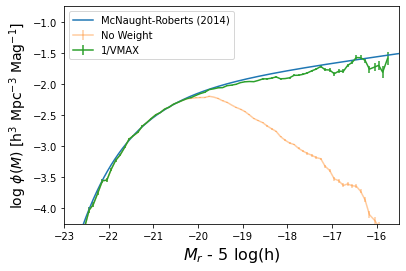

In [39]:
'''
add the errorbars to this plot
'''

Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='McNaught-Roberts (2014)')

pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='No Weight', alpha=0.4)
pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='1/VMAX')

#pl.xlabel(r'$M$')
#pl.ylabel(r'$\Phi(M)$')

pl.xlabel(r'$M_r$ - 5 log(h)', fontsize=16)
pl.ylabel(r'log $\phi(M)$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]', fontsize=14)

pl.ylim(-4.25, -.75)
pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)

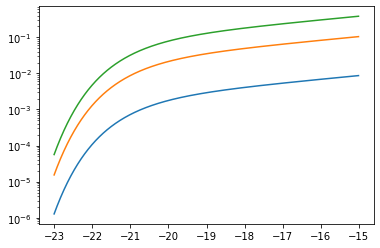

In [40]:
for d8 in [-0.75, 2., 10.]:
    Ms = np.arange(-23., -15., 0.01)
    sc = named_schechter(Ms, named_type='TMR')

    sc *= (1. + d8)
    
    pl.semilogy(Ms, sc)

In [41]:
#root = '/global/cscratch1/sd/mjwilson/norberg/GAMA4/cobaya/'

root = '/global/cscratch1/sd/ldrm11/norberg/GAMA4/cobaya/'

In [42]:
dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [43]:
samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [44]:
samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

Removed no burn in


In [45]:
tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [46]:
g = plots.get_subplot_plotter()

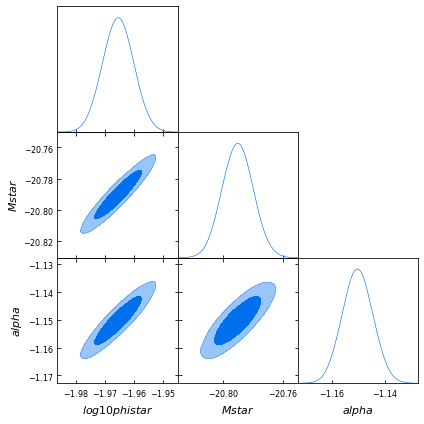

In [47]:
g.triangle_plot([samples], filled=True)        

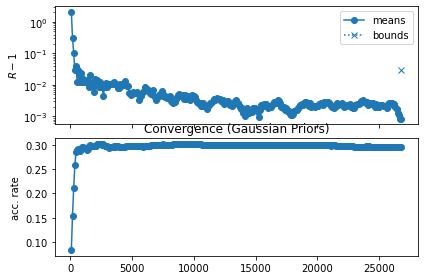

In [48]:
from cobaya.samplers.mcmc import plot_progress
# Assuming chain saved at `chains/gaussian`
plot_progress(root + 'schechter_chain') #, fig_args={"figsize": (6,4)})
import matplotlib.pyplot as plt

plt.tight_layout()
plt.title('Convergence (Gaussian Priors)')
plt.show()

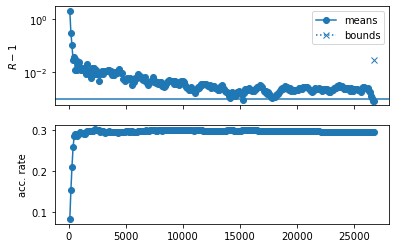

In [49]:
from cobaya.samplers.mcmc import plot_progress
# Assuming chain saved at `chains/gaussian`
plot_progress(root + 'schechter_chain')
import matplotlib.pyplot as plt

figure = plt.gcf()
axes = figure.axes

axes[0].axhline(0.001)

plt.show()


In [66]:
axes[1]

# Done.